In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
train_df = pd.read_csv('gdrive/MyDrive/Champ/train.csv', sep=',', nrows = 300000)

In [ ]:
train_df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [ ]:
subway_df = pd.read_csv('gdrive/MyDrive/Champ/subway.csv', sep=',')

In [ ]:
subway_df.head()

In [ ]:
cat_fuatures = ['ticket_id', 'ticket_type_nm', 'entrance_nm', 'station_nm', 'line_nm']

In [ ]:
num_features = ['entrance_id', 'station_id', 'line_id']

## EDA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              300000 non-null  int64  
 1   ticket_id       300000 non-null  object 
 2   ticket_type_nm  300000 non-null  object 
 3   entrance_id     300000 non-null  int64  
 4   entrance_nm     300000 non-null  object 
 5   station_id      300000 non-null  int64  
 6   station_nm      300000 non-null  object 
 7   line_id         300000 non-null  int64  
 8   line_nm         300000 non-null  object 
 9   pass_dttm       300000 non-null  object 
 10  time_to_under   300000 non-null  float64
 11  label           300000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 27.5+ MB


In [ ]:
train_df.columns

Index(['id', 'ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm',
       'station_id', 'station_nm', 'line_id', 'line_nm', 'pass_dttm',
       'time_to_under', 'label'],
      dtype='object')

Перед тестом надо выкинуть колонку id

In [ ]:
train_df.isna().sum() #нет пропусков

id                0
ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [ ]:
train_df['ticket_type_nm'].value_counts()

КОШЕЛЕК                                                   73089
30 дней ЕДИНЫЙ ТК                                         49481
Социальная карта москвича                                 34319
30 дней                                                   31376
90 дней ЕДИНЫЙ ТК                                         16802
60 поездок ЕДИНЫЙ ТК                                      14543
30 дней Пригород ТК                                       12389
30 дней СК студента                                       11863
СК студента 30 дней                                        9991
ББК                                                        7647
30 дней СК учащегося                                       6612
365 дней ЕДИНЫЙ ТК                                         6037
СК учащегося 30 дней                                       4691
Социальная карта жителя Моск. области                      4407
90 дней                                                    3447
Пропуск FacePay                         

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


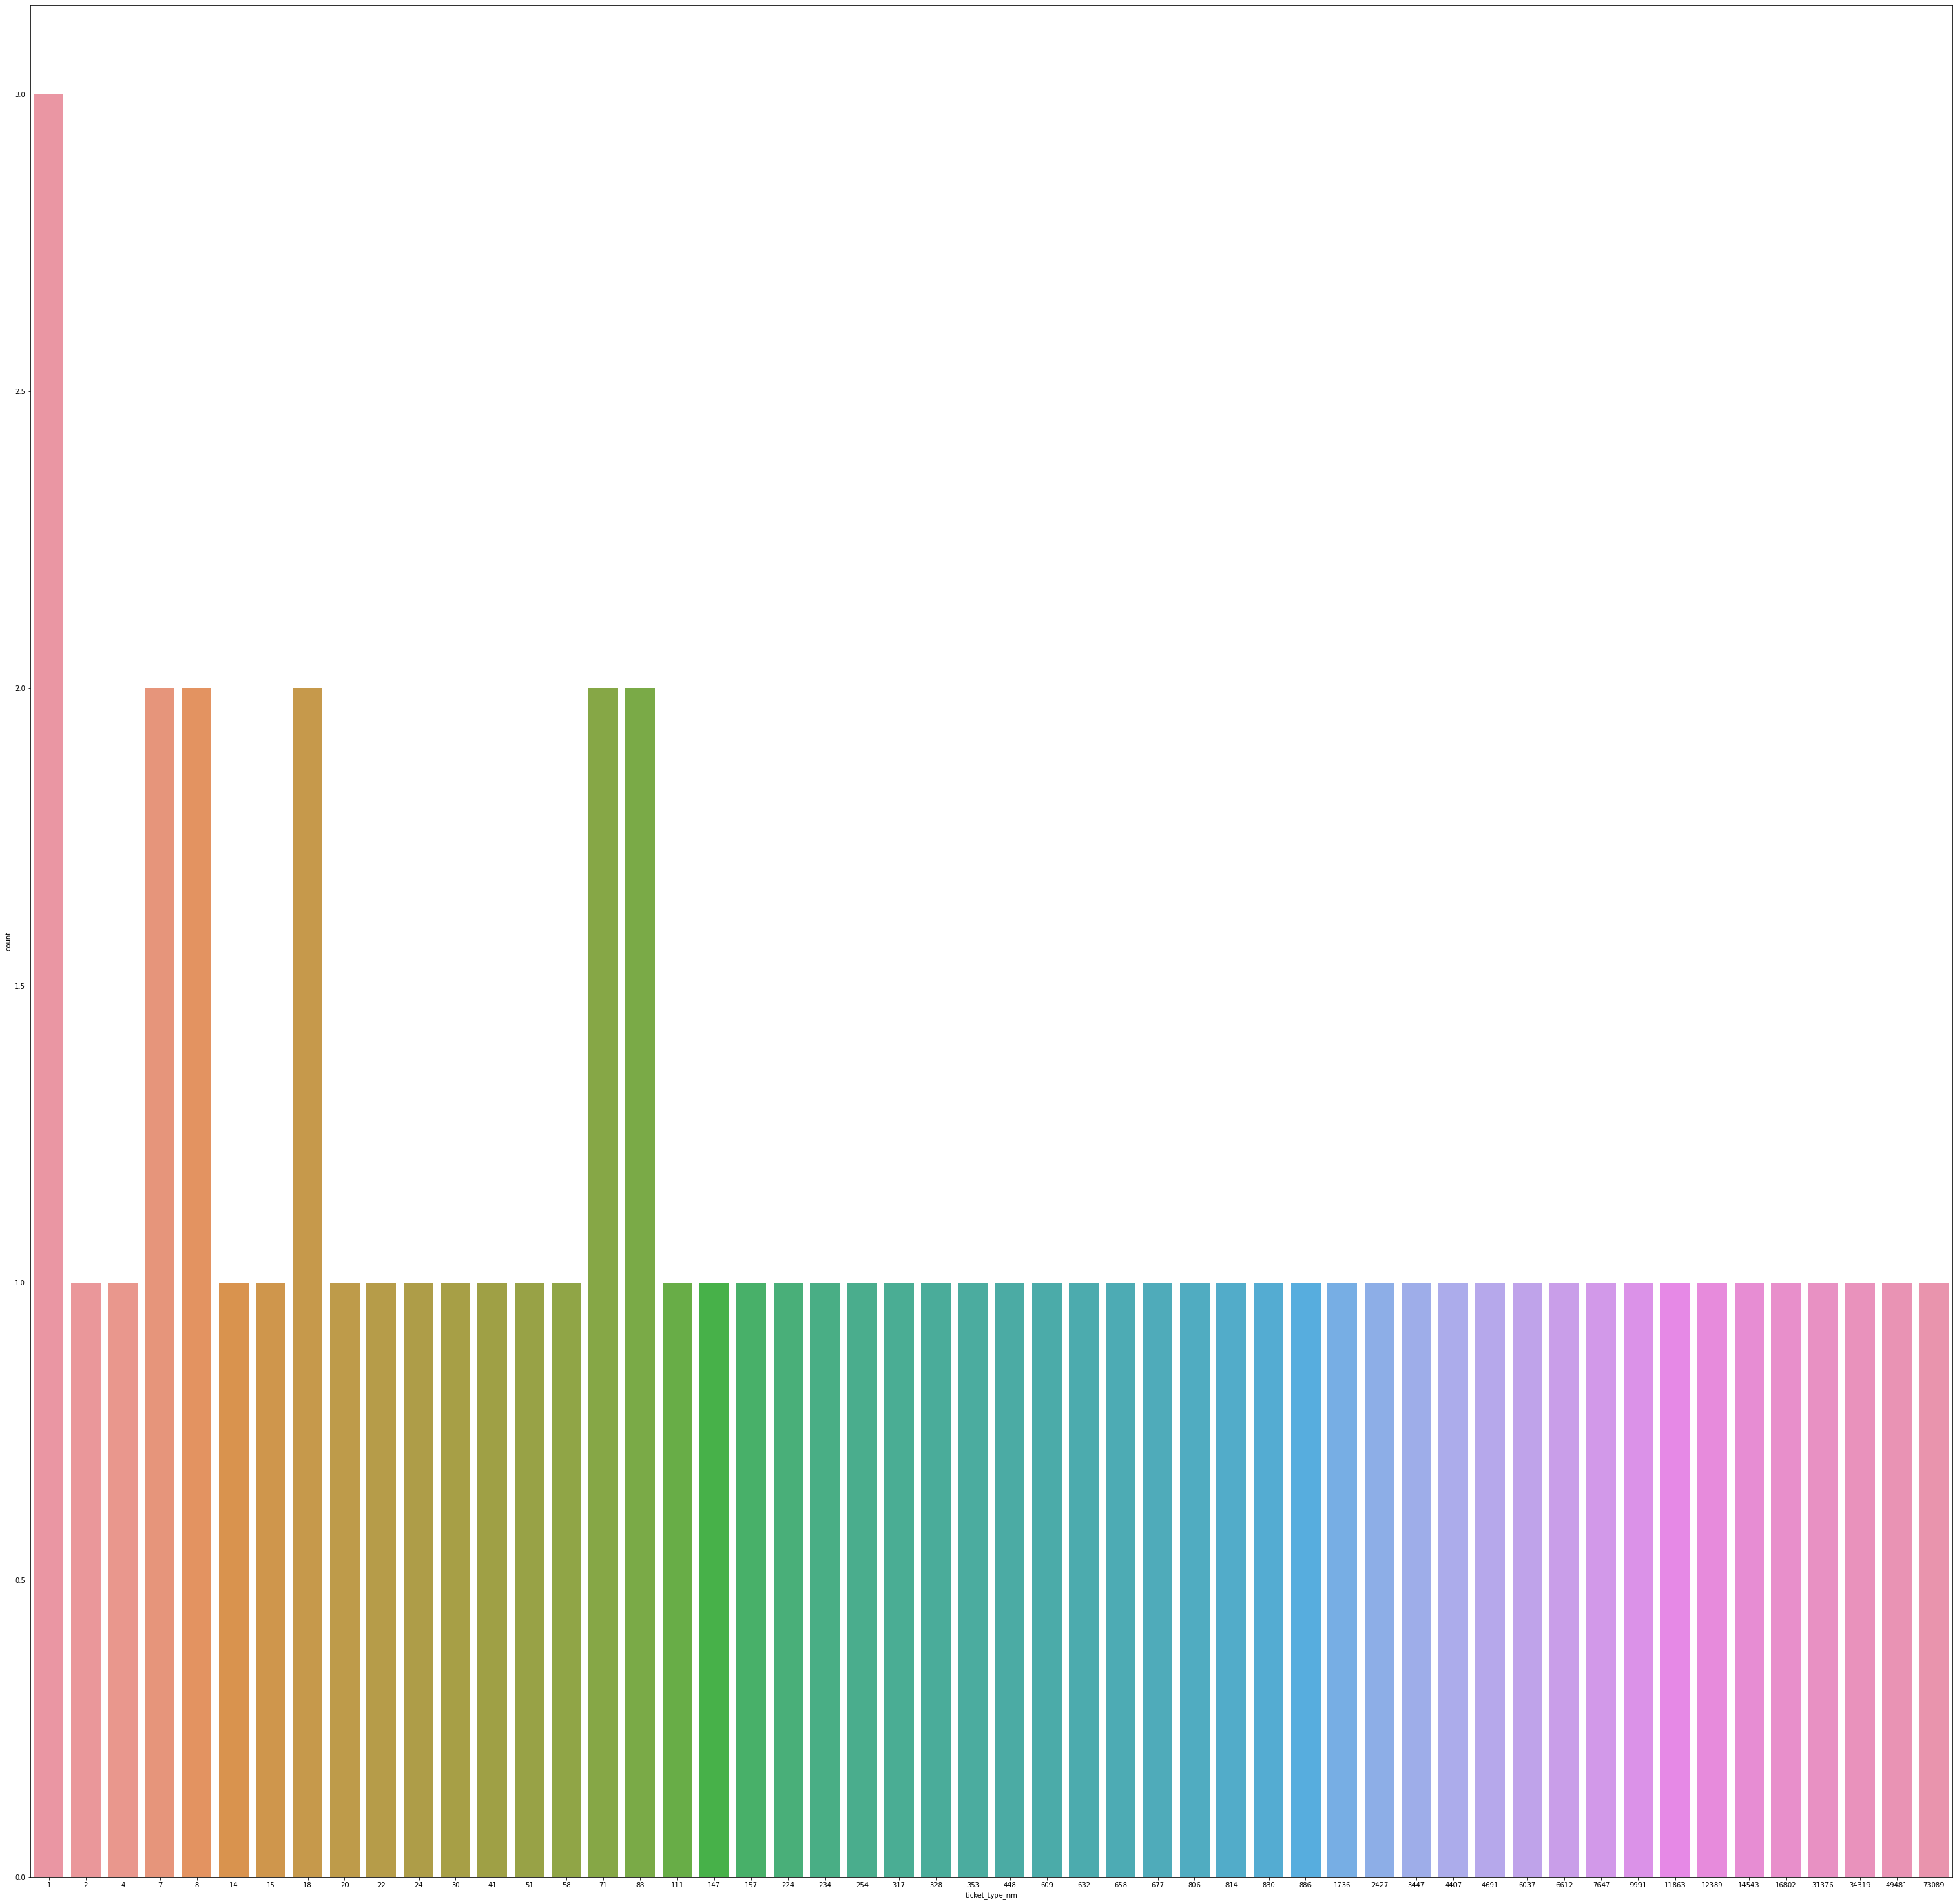

In [ ]:
plt.figure(figsize=(50, 50))

sns.countplot(train_df['ticket_type_nm'].value_counts())

In [4]:
train_df["day"] = train_df['pass_dttm'].map(lambda x: int(x.split("-")[2].split(" ")[0]))
train_df["hours"] = train_df['pass_dttm'].map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))
train_df["minutes"] = train_df['pass_dttm'].map(lambda x: int(x.split(":")[1]))
train_df["seconds"] = train_df['pass_dttm'].map(lambda x: int(x.split(":")[2]))

In [ ]:
train_df.head()

In [ ]:
train_df['ticket_id'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


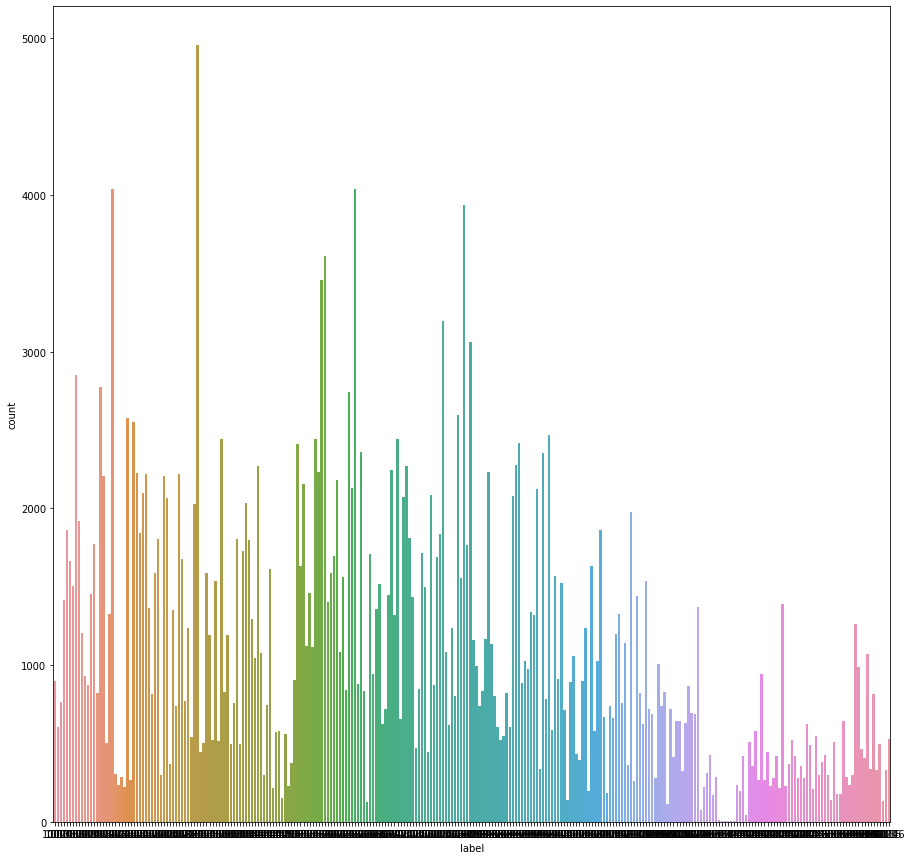

In [ ]:
plt.figure(figsize=(15, 15))

sns.countplot(train_df['label']) #классов слишком много, надо выбрать несколько самых важных

In [ ]:
cnt = train_df['label'].value_counts().rename_axis('label').reset_index(name='counts')
cnt

In [ ]:
cnt.iloc[0, 0]

In [ ]:
#попробовать 500 и тд
m = []
for i in range(len(cnt)):
    if cnt.iloc[i, 1] > 500:
      m.append(cnt.iloc[i, 0])

In [ ]:
m

In [ ]:
len(m)

In [ ]:
plt.figure(figsize=(15, 15))

px.scatter(x=train_df['id'], y=train_df['time_to_under'])

In [ ]:
train_df.head()

In [ ]:
train_df.loc[~train_df['label'].isin(m)] = np.random.choice(m, 1)[0] 

In [ ]:
np.random.choice(m, 1)[0]

In [ ]:
train_df['label'].value_counts()

In [ ]:
train_df['station_id'].value_counts()

3022     6212
7009     5570
8003     5201
15002    4878
8004     4749
         ... 
9004       22
13003      13
13001       4
13005       4
13004       4
Name: station_id, Length: 274, dtype: int64

In [5]:
station_df = pd.DataFrame(train_df.groupby('station_id')['station_id'].agg('count').rename_axis('station_id').reset_index(name='counts_station'))
train_df = train_df.merge(station_df, on='station_id', how='left')

In [ ]:
train_df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,day,hours,minutes,seconds,counts_station
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,12,5,0,13,90
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,12,5,0,54,1980
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,12,5,0,55,1980
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,12,5,1,13,1980
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,12,5,2,55,1980


In [6]:
line_df = pd.DataFrame(train_df.groupby('line_id')['line_id'].agg('count').rename_axis('line_id').reset_index(name='counts_line'))
train_df = train_df.merge(line_df, on='line_id', how='left')

In [ ]:
train_df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,day,hours,minutes,seconds,counts_station,counts_line
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,12,5,0,13,90,11357
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,12,5,0,54,1980,34407
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,12,5,0,55,1980,34407
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,12,5,1,13,1980,34407
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,12,5,2,55,1980,34407


In [ ]:
cnt_station = train_df['label'].value_counts().rename_axis('label').reset_index(name='counts')
cnt

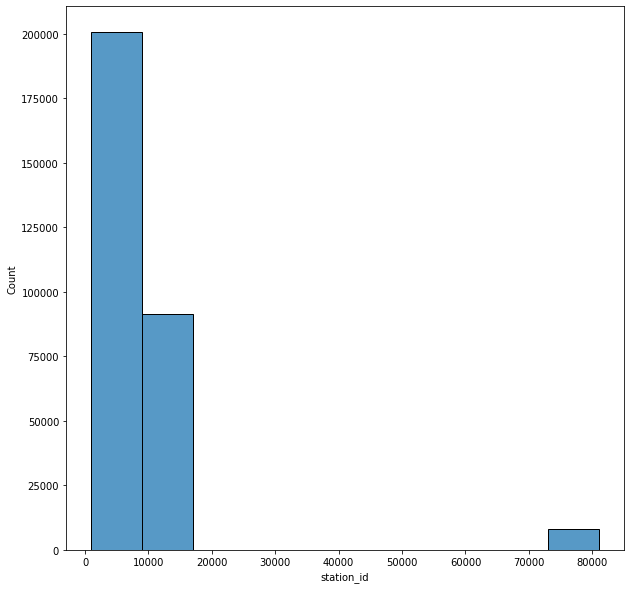

In [ ]:
plt.figure(figsize=(10, 10))

sns.histplot(train_df['station_id'], bins=10)

In [ ]:
train_df['line_id'].value_counts()

7     42298
2     34407
9     34261
6     33906
3     31011
10    26651
1     22337
8     17285
14    12370
11    11357
5      8686
15     8538
81     8128
12     4771
4      3969
13       25
Name: line_id, dtype: int64

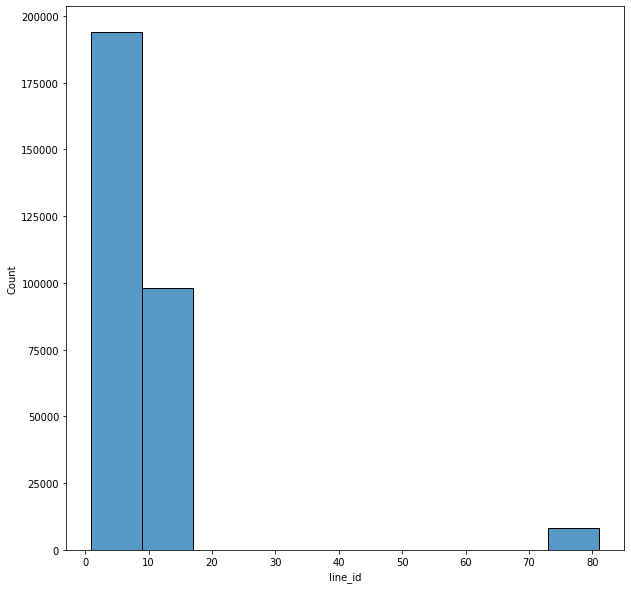

In [ ]:
plt.figure(figsize=(10, 10))

sns.histplot(train_df['line_id'], bins=10)

In [ ]:
train_df['id'].value_counts()

1         1
199989    1
200005    1
200004    1
200003    1
         ..
100000    1
99999     1
99998     1
99997     1
300000    1
Name: id, Length: 300000, dtype: int64

##Train and Test

In [17]:
X = train_df.drop(['id', 'entrance_id', 'station_id', 'line_id', 'pass_dttm', 'time_to_under', 'label'], axis = 1)
X_clf = train_df.drop(['id', 'entrance_id', 'station_id', 'line_id', 'pass_dttm', 'label'], axis = 1)
y = train_df[['time_to_under', 'label']]

In [7]:
#main
X_clf = train_df.drop(['id', 'ticket_id', 'ticket_type_nm', 'entrance_nm', 'station_nm', 'line_nm', 'pass_dttm', 'label'], axis=1) 
y_clf = train_df[['label']]

X_reg = train_df.drop(['id', 'ticket_id', 'ticket_type_nm', 'entrance_nm', 'station_nm', 'line_nm', 'pass_dttm', 'label', 'time_to_under'], axis=1)
y_reg = train_df[['time_to_under']]

In [ ]:
X.head()

,ticket_id,ticket_type_nm,entrance_nm,station_nm,line_nm,day,hours,minutes,seconds
0,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,Лефортово БКЛ,Лефортово,Большая кольцевая,12,5,0,13
1,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,Войковская ( Южный ),Войковская,Замоскворецкая,12,5,0,54
2,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,Войковская ( Южный ),Войковская,Замоскворецкая,12,5,0,55
3,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,Войковская ( Южный ),Войковская,Замоскворецкая,12,5,1,13
4,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,Войковская ( Южный ),Войковская,Замоскворецкая,12,5,2,55


In [ ]:
X_clf.head()

,ticket_id,ticket_type_nm,entrance_nm,station_nm,line_nm,time_to_under,counts_station,counts_line
0,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,Лефортово БКЛ,Лефортово,Большая кольцевая,216.316667,90,11357
1,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,Войковская ( Южный ),Войковская,Замоскворецкая,648.183333,1980,34407
2,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,Войковская ( Южный ),Войковская,Замоскворецкая,865.333333,1980,34407
3,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,Войковская ( Южный ),Войковская,Замоскворецкая,1048.233333,1980,34407
4,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,Войковская ( Южный ),Войковская,Замоскворецкая,965.600000,1980,34407


In [ ]:
y.head()

,time_to_under,label
0,216.316667,8001
1,648.183333,9011
2,865.333333,7022
3,1048.233333,2022
4,965.600000,2017


In [8]:
cat_cols = ['ticket_id', 'ticket_type_nm', 'entrance_nm', 'station_nm', 'line_nm']

In [9]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y, test_size=0.3, random_state=42)

In [12]:
#main
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

In [ ]:
X_train_clf.head()

,ticket_id,ticket_type_nm,entrance_nm,station_nm,line_nm,time_to_under,day,hours,minutes,seconds,counts_station,counts_line
186295,77AD53373A3394646A605567711F5F23,30 дней Пригород ТК,Царицыно ( Южный ),Царицыно,Замоскворецкая,785.716667,13,6,43,46,3511,34407
127847,2031FA5CACD1FD098E3C306D97403456,СК учащегося 30 дней,Каширская (Северный ),Каширская,Замоскворецкая,320.516667,12,10,24,37,914,34407
274740,3472ACBF6885BE01AC771E9FE521CA4D,КОШЕЛЕК,Щёлковская ( Северный ),Щёлковская,Арбатско-Покровская,812.216667,13,9,9,24,6212,31011
74908,9E9E842D607B7C85E46BF1AB9E674F1F,30 дней ЕДИНЫЙ ТК,Красные ворота ( Северный ),Красные Ворота,Сокольническая,572.316667,12,8,20,27,307,22337
11630,27D53FE3A8EC22F233FCFB45A011DF05,365 дней ЕДИНЫЙ ТК,Войковская ( Южный ),Войковская,Замоскворецкая,462.066667,12,6,31,0,1980,34407


In [12]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.6 MB/s 


In [13]:
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [14]:
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score

In [15]:
def cbst_reg(X_train, X_test, y_train, y_test):
  cb_reg = CatBoostRegressor(cat_features=cat_cols, n_estimators=1100, depth=9, loss_function='RMSE', task_type='GPU')
  cb_reg.fit(X_train, y_train)
  pred_reg = cb_reg.predict(X_test)
  print(0.5 * r2_score(y_test, pred_reg))
  return cb_reg

In [20]:
model_reg = cbst_reg(X_train, X_test, y_train['time_to_under'], y_test['time_to_under'])

Learning rate set to 0.07688
0:	learn: 194.0780371	total: 55.2ms	remaining: 1m
1:	learn: 188.4319512	total: 111ms	remaining: 1m
2:	learn: 183.4930191	total: 169ms	remaining: 1m 1s
3:	learn: 179.1252293	total: 225ms	remaining: 1m 1s
4:	learn: 175.3176800	total: 291ms	remaining: 1m 3s
5:	learn: 171.9666750	total: 342ms	remaining: 1m 2s
6:	learn: 169.0054773	total: 378ms	remaining: 59.1s
7:	learn: 166.4479125	total: 414ms	remaining: 56.5s
8:	learn: 164.2746615	total: 456ms	remaining: 55.3s
9:	learn: 162.3877002	total: 499ms	remaining: 54.4s
10:	learn: 160.6826200	total: 536ms	remaining: 53.1s
11:	learn: 159.2652003	total: 571ms	remaining: 51.7s
12:	learn: 158.0091686	total: 605ms	remaining: 50.6s
13:	learn: 156.8836784	total: 639ms	remaining: 49.6s
14:	learn: 155.9249128	total: 671ms	remaining: 48.5s
15:	learn: 155.1054557	total: 707ms	remaining: 47.9s
16:	learn: 154.3817408	total: 747ms	remaining: 47.6s
17:	learn: 153.7587117	total: 789ms	remaining: 47.5s
18:	learn: 153.2305955	total: 82

In [ ]:
#0.23966706961731754

In [ ]:
def cbst_clf(X_train, X_test, y_train, y_test):
  cb_clf = CatBoostClassifier(cat_features=cat_cols, n_estimators=400, depth=4, task_type='GPU')
  cb_clf.fit(X_train, y_train)
  pred_clf = cb_clf.predict(X_test)
  print(0.5 * recall_score(y_test, pred_clf, average='macro'))
  return cb_clf

In [ ]:
model_clf = cbst_clf(X_train_clf, X_test_clf, y_train['label'], y_test['label'])

Learning rate set to 0.414477
0:	learn: 5.3429506	total: 4.41s	remaining: 29m 21s
1:	learn: 5.2825571	total: 8.75s	remaining: 29m 1s
2:	learn: 5.2025006	total: 13.1s	remaining: 28m 56s
3:	learn: 5.1642690	total: 17.5s	remaining: 28m 53s
4:	learn: 5.1248500	total: 22.2s	remaining: 29m 10s
5:	learn: 5.1092905	total: 26.6s	remaining: 29m 5s
6:	learn: 5.0533375	total: 31s	remaining: 28m 57s
7:	learn: 4.9949952	total: 35.6s	remaining: 29m 2s
8:	learn: 4.9669708	total: 40.6s	remaining: 29m 25s
9:	learn: 4.9434714	total: 45.4s	remaining: 29m 31s
10:	learn: 4.9324375	total: 49.8s	remaining: 29m 19s
11:	learn: 4.9146857	total: 54.6s	remaining: 29m 26s
12:	learn: 4.8988164	total: 59s	remaining: 29m 17s
13:	learn: 4.8830149	total: 1m 3s	remaining: 29m 14s
14:	learn: 4.8716958	total: 1m 8s	remaining: 29m 5s
15:	learn: 4.8613878	total: 1m 12s	remaining: 28m 56s
16:	learn: 4.8472283	total: 1m 16s	remaining: 28m 48s
17:	learn: 4.8418554	total: 1m 21s	remaining: 28m 40s
18:	learn: 4.8283408	total: 1m 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_clf_upd = CatBoostClassifier(cat_features=cat_cols, n_estimators=520, depth=4, task_type='GPU')

In [ ]:
X_clf.head()

,ticket_id,ticket_type_nm,entrance_nm,station_nm,line_nm,time_to_under,day,hours,minutes,seconds
0,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,Лефортово БКЛ,Лефортово,Большая кольцевая,216.316667,12,5,0,13
1,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,Войковская ( Южный ),Войковская,Замоскворецкая,648.183333,12,5,0,54
2,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,Войковская ( Южный ),Войковская,Замоскворецкая,865.333333,12,5,0,55
3,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,Войковская ( Южный ),Войковская,Замоскворецкая,1048.233333,12,5,1,13
4,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,Войковская ( Южный ),Войковская,Замоскворецкая,965.600000,12,5,2,55


In [ ]:
model_clf_upd.fit(X_clf, y['label'])

Learning rate set to 0.35825
0:	learn: 5.3657108	total: 6.12s	remaining: 52m 57s
1:	learn: 5.3218167	total: 12.2s	remaining: 52m 39s
2:	learn: 5.2187829	total: 18.3s	remaining: 52m 27s
3:	learn: 5.1868546	total: 24.3s	remaining: 52m 15s
4:	learn: 5.0880254	total: 30.4s	remaining: 52m 15s
5:	learn: 5.0454162	total: 36.6s	remaining: 52m 13s
6:	learn: 4.9927388	total: 42.6s	remaining: 52m 5s
7:	learn: 4.9786379	total: 48.7s	remaining: 51m 56s
8:	learn: 4.9483683	total: 54.8s	remaining: 51m 50s
9:	learn: 4.9264192	total: 1m	remaining: 51m 43s
10:	learn: 4.9121354	total: 1m 6s	remaining: 51m 37s
11:	learn: 4.9027229	total: 1m 12s	remaining: 51m 30s
12:	learn: 4.8953700	total: 1m 19s	remaining: 51m 22s
13:	learn: 4.8832829	total: 1m 25s	remaining: 51m 16s
14:	learn: 4.8619867	total: 1m 31s	remaining: 51m 36s
15:	learn: 4.8576067	total: 1m 38s	remaining: 51m 50s
16:	learn: 4.8484442	total: 1m 44s	remaining: 51m 41s
17:	learn: 4.8386758	total: 1m 50s	remaining: 51m 32s
18:	learn: 4.8284975	tot

In [ ]:
train_df.head()

In [16]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [21]:
X_clf = train_df.drop(['id', 'ticket_id', 'ticket_type_nm', 'entrance_nm', 'station_nm', 'line_nm', 'pass_dttm', 'label'], axis=1) 
y_clf = train_df[['label']]

In [23]:
X_reg = train_df.drop(['id', 'ticket_id', 'ticket_type_nm', 'entrance_nm', 'station_nm', 'line_nm', 'pass_dttm', 'label', 'time_to_under'], axis=1)
y_reg = train_df[['time_to_under']]

In [31]:
X_clf.head()

,entrance_id,station_id,line_id,time_to_under,day,hours,minutes,seconds,counts_station,counts_line
0,2402,11007,11,216.316667,12,5,0,13,90,11357
1,110,2006,2,648.183333,12,5,0,54,1980,34407
2,110,2006,2,865.333333,12,5,0,55,1980,34407
3,110,2006,2,1048.233333,12,5,1,13,1980,34407
4,110,2006,2,965.600000,12,5,2,55,1980,34407


In [32]:
X_reg

,entrance_id,station_id,line_id,day,hours,minutes,seconds,counts_station,counts_line
0,2402,11007,11,12,5,0,13,90,11357
1,110,2006,2,12,5,0,54,1980,34407
2,110,2006,2,12,5,0,55,1980,34407
3,110,2006,2,12,5,1,13,1980,34407
4,110,2006,2,12,5,2,55,1980,34407
...,...,...,...,...,...,...,...,...,...
299995,2013,12005,12,13,10,28,52,705,4771
299996,236,6003,6,13,10,28,53,3504,33906
299997,301,7016,7,13,10,28,54,3093,42298
299998,2117,7007,7,13,10,28,54,3459,42298


In [ ]:
y1.head()

,time_to_under
0,216.316667
1,648.183333
2,865.333333
3,1048.233333
4,965.600000


In [24]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [25]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

In [20]:
X1_train

,entrance_id,station_id,line_id,time_to_under,day,hours,minutes,seconds,counts_station,counts_line
186295,79,2023,2,785.716667,13,6,43,46,3511,34407
127847,118,2010,2,320.516667,12,10,24,37,914,34407
274740,153,3022,3,812.216667,13,9,9,24,6212,31011
74908,35,1006,1,572.316667,12,8,20,27,307,22337
11630,110,2006,2,462.066667,12,6,31,0,1980,34407
...,...,...,...,...,...,...,...,...,...,...
119879,2074,3009,3,633.716667,12,9,50,49,1521,31011
259178,213,5003,5,606.083333,13,8,37,51,695,8686
131932,2263,15002,15,222.716667,12,10,47,37,4878,8538
146867,218,8003,8,444.583333,12,13,5,3,5201,17285


In [26]:
cb_reg_df = pd.DataFrame(model_reg.predict(X_test), columns=['model0'])
cb_reg_df.head()

,model0
0,594.308207
1,550.506734
2,459.199777
3,453.855180
4,775.040412


In [27]:
xgb_model = xgb.XGBRegressor(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)

In [28]:
def stacking(models, X_train, X_test, y_train, y_test, models_dataset):
  cnt = 0
  for model in models:
    cnt += 1
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("model #", cnt, ":", 0.5 * r2_score(y_test, pred))
    pred_df = pd.DataFrame(pred, columns=['model'+str(cnt)])
    models_dataset = pd.concat([models_dataset, pred_df], axis=1)
  return models_dataset

In [41]:
X_train.head()

,ticket_id,ticket_type_nm,entrance_nm,station_nm,line_nm,day,hours,minutes,seconds,counts_station,counts_line
186295,77AD53373A3394646A605567711F5F23,30 дней Пригород ТК,Царицыно ( Южный ),Царицыно,Замоскворецкая,13,6,43,46,3511,34407
127847,2031FA5CACD1FD098E3C306D97403456,СК учащегося 30 дней,Каширская (Северный ),Каширская,Замоскворецкая,12,10,24,37,914,34407
274740,3472ACBF6885BE01AC771E9FE521CA4D,КОШЕЛЕК,Щёлковская ( Северный ),Щёлковская,Арбатско-Покровская,13,9,9,24,6212,31011
74908,9E9E842D607B7C85E46BF1AB9E674F1F,30 дней ЕДИНЫЙ ТК,Красные ворота ( Северный ),Красные Ворота,Сокольническая,12,8,20,27,307,22337
11630,27D53FE3A8EC22F233FCFB45A011DF05,365 дней ЕДИНЫЙ ТК,Войковская ( Южный ),Войковская,Замоскворецкая,12,6,31,0,1980,34407


In [43]:
X_reg_train.head()

,entrance_id,station_id,line_id,day,hours,minutes,seconds,counts_station,counts_line
186295,79,2023,2,13,6,43,46,3511,34407
127847,118,2010,2,12,10,24,37,914,34407
274740,153,3022,3,13,9,9,24,6212,31011
74908,35,1006,1,12,8,20,27,307,22337
11630,110,2006,2,12,6,31,0,1980,34407


In [ ]:
y1.head()

,time_to_under
0,216.316667
1,648.183333
2,865.333333
3,1048.233333
4,965.600000


In [29]:
models = []
models.append(lgb.LGBMRegressor(boosting_type='gbdt', max_depth=7))
models.append(xgb_model)
models.append(RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1))
models.append(lgb.LGBMRegressor(max_depth=9, n_etimators=65))
models.append(RandomForestRegressor(n_estimators=100, max_depth=3))

In [30]:
reg_df = stacking(models, X_reg_train, X_reg_test, y_reg_train, y_reg_test, cb_reg_df)

model # 1 : 0.19873074219618914
[16:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model # 2 : 0.19672526393512368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


model # 3 : 0.19711851218594795
model # 4 : 0.19874098060729561


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


model # 5 : 0.19029857559063146


In [31]:
reg_df.head()

,model0,model1,model2,model3,model4,model5
0,594.308207,706.648511,683.628723,712.384819,702.311786,702.063079
1,550.506734,611.519020,610.083374,611.710573,612.161056,623.252993
2,459.199777,532.507659,553.381470,534.484805,529.493892,570.350743
3,453.855180,500.767351,502.634857,504.535520,501.080238,491.575218
4,775.040412,764.010419,808.586060,715.022567,767.907009,702.063079


In [ ]:
reg_df.shape

(90000, 4)

In [32]:
model_reg_upd = CatBoostRegressor(n_estimators=1430, depth=9, loss_function='RMSE', task_type='GPU')

In [33]:
model_reg_upd.fit(reg_df, y_reg_test)

Learning rate set to 0.058828
0:	learn: 195.4080203	total: 20.5ms	remaining: 29.3s
1:	learn: 190.4157528	total: 30.6ms	remaining: 21.9s
2:	learn: 185.8746015	total: 39.6ms	remaining: 18.8s
3:	learn: 181.7906156	total: 48.6ms	remaining: 17.3s
4:	learn: 178.0434424	total: 57.7ms	remaining: 16.4s
5:	learn: 174.6319029	total: 66.6ms	remaining: 15.8s
6:	learn: 171.5474190	total: 75.7ms	remaining: 15.4s
7:	learn: 168.7659829	total: 84.6ms	remaining: 15s
8:	learn: 166.2572465	total: 93.8ms	remaining: 14.8s
9:	learn: 163.9792290	total: 103ms	remaining: 14.6s
10:	learn: 161.9271057	total: 112ms	remaining: 14.4s
11:	learn: 160.0817480	total: 121ms	remaining: 14.2s
12:	learn: 158.4346180	total: 130ms	remaining: 14.1s
13:	learn: 156.9630535	total: 141ms	remaining: 14.3s
14:	learn: 155.6310166	total: 150ms	remaining: 14.2s
15:	learn: 154.4464455	total: 159ms	remaining: 14.1s
16:	learn: 153.3744084	total: 168ms	remaining: 14s
17:	learn: 152.4016308	total: 177ms	remaining: 13.9s
18:	learn: 151.541784

In [34]:
def stacking_clf(models, X_train, X_test, y_train, y_test, models_dataset):
  cnt = 0
  for model in models:
    cnt += 1
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("model #", cnt, ":", 0.5 * recall_score(y_test, pred, average='macro'))
    pred_df = pd.DataFrame(pred, columns=['model'+str(cnt)])
    models_dataset = pd.concat([models_dataset, pred_df], axis=1)
  return models_dataset

In [35]:
X_clf_train.head()

,entrance_id,station_id,line_id,time_to_under,day,hours,minutes,seconds,counts_station,counts_line
186295,79,2023,2,785.716667,13,6,43,46,3511,34407
127847,118,2010,2,320.516667,12,10,24,37,914,34407
274740,153,3022,3,812.216667,13,9,9,24,6212,31011
74908,35,1006,1,572.316667,12,8,20,27,307,22337
11630,110,2006,2,462.066667,12,6,31,0,1980,34407


In [36]:
y_clf_train.head()

,label
186295,7015
127847,2011
274740,2011
74908,5001
11630,2017


In [37]:
model_clf = RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=4)
model_clf.fit(X_clf_train, y_clf_train)
pred0 = model_clf.predict(X_clf_test)
print("model #", 0, ":", 0.5 * recall_score(y_clf_test, pred0, average='macro'))
pred_clf_df = pd.DataFrame(pred0, columns=['model0'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


model # 0 : 0.014416266655293768


In [38]:
models_clf = []
models_clf.append(lgb.LGBMClassifier(num_leaves=35, n_estimators=20))
models_clf.append(RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=5))
models_clf.append(lgb.LGBMClassifier(boosting_type='dart', num_leaves=17, n_estimators=40))
models_clf.append(RandomForestClassifier(n_estimators=20, max_depth=8, min_samples_split=3))
models_clf.append(lgb.LGBMClassifier(num_leaves=20, n_estimators=30))

In [39]:
clf_df = stacking_clf(models_clf, X_clf_train, X_clf_test, y_clf_train, y_clf_test, pred_clf_df)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

model # 1 : 0.019068343209065877
model # 2 : 0.012978625721358725


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

model # 3 : 0.018986639895144243
model # 4 : 0.018538639177789282


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model # 5 : 0.019905792370486376


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
clf_df.head()

,model0,model1,model2,model3,model4,model5
0,2001,81004,2004,2024,2001,2008
1,7022,7014,7020,7022,7004,7014
2,3002,14029,3002,14025,3002,3002
3,8001,8001,8001,8001,8001,8007
4,11021,11001,11021,11001,11021,11001


In [41]:
model_clf_upd = lgb.LGBMClassifier(n_estimators=150, max_depth=5, min_samples_split=4)

In [42]:
model_clf_upd.fit(clf_df, y_clf_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(max_depth=5, min_samples_split=4, n_estimators=150)

##Test

In [43]:
test_df = pd.read_csv('gdrive/MyDrive/Champ/test.csv', sep=',')

In [ ]:
test_df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm
0,1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03
1,1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45
2,1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52
3,1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58
4,1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39


In [ ]:
test_df.shape

In [44]:
test_df["day"] = test_df['pass_dttm'].map(lambda x: int(x.split("-")[2].split(" ")[0]))
test_df["hours"] = test_df['pass_dttm'].map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))
test_df["minutes"] = test_df['pass_dttm'].map(lambda x: int(x.split(":")[1]))
test_df["seconds"] = test_df['pass_dttm'].map(lambda x: int(x.split(":")[2]))

test_df = test_df.merge(station_df, on='station_id', how='left')
test_df = test_df.merge(line_df, on='line_id', how='left')

In [ ]:
test_df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,day,hours,minutes,seconds,counts_station,counts_line
0,1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03,12,5,0,3,1980.0,34407
1,1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45,12,5,0,45,2747.0,31011
2,1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52,12,5,0,52,1980.0,34407
3,1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58,12,5,0,58,1057.0,34407
4,1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39,12,5,1,39,1980.0,34407


In [45]:
X_reg = test_df.drop(['id', 'entrance_id', 'station_id', 'line_id', 'pass_dttm'], axis = 1)

In [46]:
X_rg = test_df.drop(['id', 'ticket_id', 'ticket_type_nm', 'entrance_nm', 'station_nm', 'line_nm', 'pass_dttm'], axis=1)

In [75]:
X_rg.head()

,entrance_id,station_id,line_id,day,hours,minutes,seconds,counts_station,counts_line
0,110,2006,2,12,5,0,3,1980.0,34407
1,184,3010,3,12,5,0,45,2747.0,31011
2,110,2006,2,12,5,0,52,1980.0,34407
3,107,2018,2,12,5,0,58,1057.0,34407
4,110,2006,2,12,5,1,39,1980.0,34407


In [47]:
X_rg = X_rg.fillna(0)

In [63]:
X_reg.head()

,ticket_id,ticket_type_nm,entrance_nm,station_nm,line_nm,day,hours,minutes,seconds,counts_station,counts_line
0,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,Войковская ( Южный ),Войковская,Замоскворецкая,12,5,0,3,1980.0,34407
1,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,Молодёжная (Западный),Молодёжная,Арбатско-Покровская,12,5,0,45,2747.0,31011
2,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,Войковская ( Южный ),Войковская,Замоскворецкая,12,5,0,52,1980.0,34407
3,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,Сокол ( Южн./Вост. ),Сокол,Замоскворецкая,12,5,0,58,1057.0,34407
4,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,Войковская ( Южный ),Войковская,Замоскворецкая,12,5,1,39,1980.0,34407


In [70]:
X_reg.isna().sum()

ticket_id         0
ticket_type_nm    0
entrance_nm       0
station_nm        0
line_nm           0
day               0
hours             0
minutes           0
seconds           0
counts_station    1
counts_line       0
dtype: int64

In [52]:
X_reg = X_reg.fillna(0)

In [48]:
#пока не трогаю
X_clf = test_df.drop(['id', 'ticket_id', 'ticket_type_nm', 'entrance_nm', 'station_nm', 'line_nm', 'pass_dttm'], axis=1)

In [49]:
X_clf = X_clf.fillna(0)

In [50]:
X_clf.head()

,entrance_id,station_id,line_id,day,hours,minutes,seconds,counts_station,counts_line
0,110,2006,2,12,5,0,3,1980.0,34407
1,184,3010,3,12,5,0,45,2747.0,31011
2,110,2006,2,12,5,0,52,1980.0,34407
3,107,2018,2,12,5,0,58,1057.0,34407
4,110,2006,2,12,5,1,39,1980.0,34407


In [53]:
pr1 = model_reg.predict(X_reg)
pr1 = pd.DataFrame(pr1, columns=['model0'])
pr1.head()

,model0
0,683.308304
1,255.899173
2,450.864211
3,635.215430
4,704.694308


In [54]:
def predict_stacking(models, X, models_dataset):
  cnt = 0
  for model in models:
    cnt += 1
    pred = model.predict(X)
    pred_df = pd.DataFrame(pred, columns=['model'+str(cnt)])
    models_dataset = pd.concat([models_dataset, pred_df], axis=1)
  return models_dataset

In [55]:
def predict_stacking_clf(models, X, models_dataset):
  cnt = 0
  for model in models:
    cnt += 1
    pred = model.predict(X)
    pred_df = pd.DataFrame(pred, columns=['model'+str(cnt)])
    models_dataset = pd.concat([models_dataset, pred_df], axis=1)
  return models_dataset

In [56]:
pr_time = predict_stacking(models, X_rg, pr1)
#pr_lab = cbst_clf.predict(X_t)

In [57]:
pr_time.head()

,model0,model1,model2,model3,model4,model5
0,683.308304,576.865009,633.488098,533.340870,561.359422,702.063079
1,255.899173,574.665648,712.872620,537.097754,552.956801,702.063079
2,450.864211,573.365106,649.789917,537.097754,566.670933,702.063079
3,635.215430,556.790623,658.634644,539.316925,562.486403,702.063079
4,704.694308,566.507679,643.754639,537.097754,562.632687,702.063079


In [58]:
pr_time = model_reg_upd.predict(pr_time)

In [59]:
pr_t = pd.DataFrame(pr_time, columns=['time_to_under'])
pr_t

,time_to_under
0,844.503320
1,582.888449
2,556.567775
3,757.474276
4,917.704862
...,...
561885,750.076601
561886,620.278761
561887,632.533193
561888,662.678083


In [60]:
X_clf_new = pd.concat([X_clf.loc[:, 'entrance_id':'line_id'], pr_t], axis=1)

In [61]:
X_clf_new.head()

,entrance_id,station_id,line_id,time_to_under
0,110,2006,2,844.503320
1,184,3010,3,582.888449
2,110,2006,2,556.567775
3,107,2018,2,757.474276
4,110,2006,2,917.704862


In [63]:
X_clf_new = pd.concat([X_clf_new, X_clf.loc[:, 'day':'counts_line']], axis=1)

In [64]:
X_clf_new.head()

,entrance_id,station_id,line_id,time_to_under,day,hours,minutes,seconds,counts_station,counts_line
0,110,2006,2,844.503320,12,5,0,3,1980.0,34407
1,184,3010,3,582.888449,12,5,0,45,2747.0,31011
2,110,2006,2,556.567775,12,5,0,52,1980.0,34407
3,107,2018,2,757.474276,12,5,0,58,1057.0,34407
4,110,2006,2,917.704862,12,5,1,39,1980.0,34407


In [66]:
pr_lab = model_clf.predict(X_clf_new)
pr_lab = pd.DataFrame(pr_lab, columns=['model0'])

In [67]:
pr_lab.head()

,model0
0,2004
1,3002
2,2004
3,2004
4,2004


In [68]:
pr_lab = predict_stacking_clf(models_clf, X_clf_new, pr_lab)
pr_lab.head()

,model0,model1,model2,model3,model4,model5
0,2004,6009,2004,6009,2004,6009
1,3002,12006,3002,81014,3002,81014
2,2004,81015,2004,1025,2018,1025
3,2004,11005,2004,11011,2004,1025
4,2004,6009,2004,6009,2004,6009


In [69]:
pr_l = model_clf_upd.predict(pr_lab)

In [70]:
pr_l = pd.DataFrame(pr_l, columns=['label'])
pr_l

,label
0,3002
1,6009
2,3002
3,3002
4,3002
...,...
561885,3002
561886,7016
561887,3002
561888,3002


In [76]:
pr_l['label'].value_counts()

3002     315452
5007      27726
6014      14576
2007      11160
3020      10609
          ...  
12006         2
8006          2
12002         1
8002          1
1006          1
Name: label, Length: 215, dtype: int64

In [77]:
train_df['label'].value_counts()

3002     4956
6008     4039
1022     4038
7022     3934
5010     3613
         ... 
13003       6
13005       5
13006       4
13002       3
13004       2
Name: label, Length: 276, dtype: int64

In [71]:
submission = pd.read_csv('gdrive/MyDrive/Champ/sample_solution.csv', sep=',')

In [72]:
submission

,id,time_to_under,label
0,1091022,0,0
1,1091023,0,0
2,1091024,0,0
3,1091025,0,0
4,1091026,0,0
...,...,...,...
561885,1652907,0,0
561886,1652908,0,0
561887,1652909,0,0
561888,1652910,0,0


In [73]:
submission['time_to_under'] = pr_t
submission['label'] = pr_l

In [74]:
submission.head(10)

,id,time_to_under,label
0,1091022,844.503320,3002
1,1091023,582.888449,6009
2,1091024,556.567775,3002
3,1091025,757.474276,3002
4,1091026,917.704862,3002
5,1091027,198.999510,7014
6,1091028,620.290994,3002
7,1091029,395.350858,3020
8,1091030,323.260245,6004
9,1091031,922.307112,3002


In [75]:
submission.to_csv('gdrive/MyDrive/Champ/my_submission.csv', index=False)